In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np

# 1. One dimensional case

We are going to study a very simple one dimensional function:

$$f(x) = x^3 -2x + 2$$

Let's plot it in the range $[-2, 2]$ to see how it looks like:

In [2]:
def f(x):
    return x**3 -2*x + 2

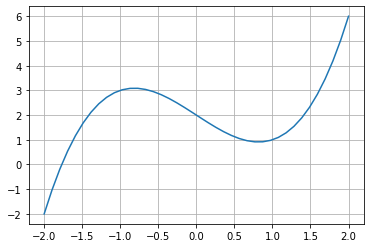

In [3]:
x = np.linspace(-2, 2, 40)

plt.plot(x, f(x))
plt.grid()
plt.show()

As we can see in the above graph, the function is first increasing until it reaches a local maximum, then decreases until it reaches a local minimum, and then it increases again.

In order to find out which are the local extrema, let's first compute the derivative of our function:

$$f'(x) = 3x^2 - 2$$

Let's define it as Python function:

In [4]:
def derivative_f(x):
    return 3*x**2 - 2

Now, let's compute the critical points of our function. To find them, we must solve the above equation when $f'(x) = 0$. After solving it, we obtain the following points: 

$x_1 = -\sqrt{\frac{2}{3}}$


$x_2 = \sqrt{\frac{2}{3}}$

In [5]:
x_1 = -np.sqrt(2/3)
x_2 = np.sqrt(2/3)

In order to get a better view of how the derivative and the critical points of a function relate, let's plot both $f(x)$ and $f'(x)$:

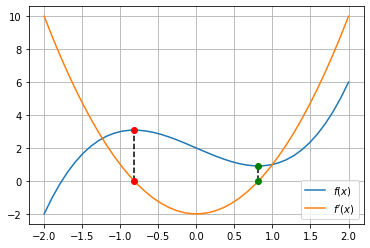

In [6]:
plt.clf()

plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, derivative_f(x), label=r"$f'(x)$")

plt.vlines(x_1, ymin=0, ymax=f(x_1), colors=['k'], linestyle=['dashed'])
plt.vlines(x_2, ymin=0, ymax=f(x_2), colors=['k'], linestyle=['dashed'])

plt.plot(x_1, f(x_1), 'ro')
plt.plot(x_1, derivative_f(x_1), 'ro')

plt.plot(x_2, f(x_2), 'go')
plt.plot(x_2, derivative_f(x_2), 'go')

plt.grid()
plt.legend()
plt.show()

As we can see, those points where the first derivative is zero are, indeed, the local extrema of our function. Now, let's compute the second derivative of our function, which will give us more information about the function itself:

$f''(x) = 6x$

In [7]:
def derivative_2_f(x):
    return 6*x

Let's plot now the second derivative along with our original function to see how they behave:

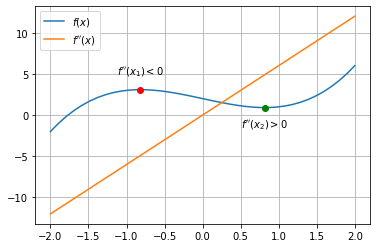

In [8]:
plt.clf()

plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, derivative_2_f(x), label=r"$f''(x)$")

plt.text(x=x_1, y=5, s=r"$f''(x_1) < 0$", ha='center')
plt.text(x=x_2, y=-1.5, s=r"$f''(x_2) > 0$", ha='center')

plt.plot(x_1, f(x_1), 'ro')
plt.plot(x_2, f(x_2), 'go')

plt.legend()
plt.grid()
plt.show()

In the above plot, we can observe that there is a change of convexity (from convex to concave) at $x=0$. 

It is then clear that $x_1$ is a local maximum (we can approximate $f(x)$ with a convex second order Taylor expansion at $x_1$ in its vecinity since $f''(x_1>0)$ ).

In the same way, we can say that $x_2$ is a local maximum (we can approximate $f(x)$ with a concave second order Taylor expansion at $x_2$ in its vecinity since $f''(x_2<0)$ ).

# 2. Two dimensional case
## 2.1 A simple two-dimensional function

In this section, we are going to study a very simple two-dimensional function, which is defined as follows:

$$f(\mathbf{x}) = x_1^2 + x_2^2$$

Now, let's define this function in Python:

In [9]:
def f(x_0, x_1):
    return x_0**2 + x_1**2

To get a better of this function, let's plot its surface using the function that can be seen below:

In [10]:
def plot_function_surface(func, x_1_range=(-2, 2), x_2_range=(-2, 2), n_samples=100):
    '''
    Function used to plot the surface of a 3D function.
    
    Generates both a 3D and a 2D plot of the surface of a 3D function by
    generating a 2D grid of points which will be evaluated using the given
    function.
    
    Paramteres
    ----------
        func: function (N,), (N,) -> (N,)
            Function to plotted. It is applied to each pair of values of
            the grid and returns a new value. 
        
        x_1_range: tuple of int, optional, default=(-2, 2)
            Tuple that specifies the range of the x_1 axis.
            
        x_2_range: tuple of int, optional, default=(-2, 2)
            Tuple that specifies the range of the x_2 axis.
        
        n_samples: int, optional, default=100
            Number of points that have to be generated in each axis.
    '''
    # Generate meshgrid and compute Z value
    x_1 = np.linspace(*x_1_range, n_samples)
    x_2 = np.linspace(*x_2_range, n_samples)
    X_1, X_2 = np.meshgrid(x_1, x_2)

    Z = np.array(func(np.ravel(X_1), np.ravel(X_2))).reshape(X_1.shape)
    
    # Clear current figure
    plt.clf()
    
    # Set figure size
    fig = plt.figure(figsize=(20, 8))
    
    # Create subplots
    ax1 = plt.subplot(121, projection='3d')
    ax2 = plt.subplot(122)    

    # Plot surface in axis 1
    surface = ax1.plot_surface(X_2, X_1, Z, cmap=cm.jet, rcount=100, ccount=100)
    
    # Plot contour and color bar which maps values to colors in axis 2
    ax2.contourf(X_2, X_1, Z, cmap=cm.jet)
    fig.colorbar(surface, shrink=0.5, aspect=5, ax=ax2)
    
    # Set labels
    ax1.set_xlabel(r'$x_2$')
    ax1.set_ylabel(r'$x_1$')
    ax1.set_zlabel(r'$f(x_1, x_2)$')
    
    ax2.set_xlabel(r'$x_2$')
    ax2.set_ylabel(r'$x_1$')    
    
    plt.show()

<Figure size 432x288 with 0 Axes>

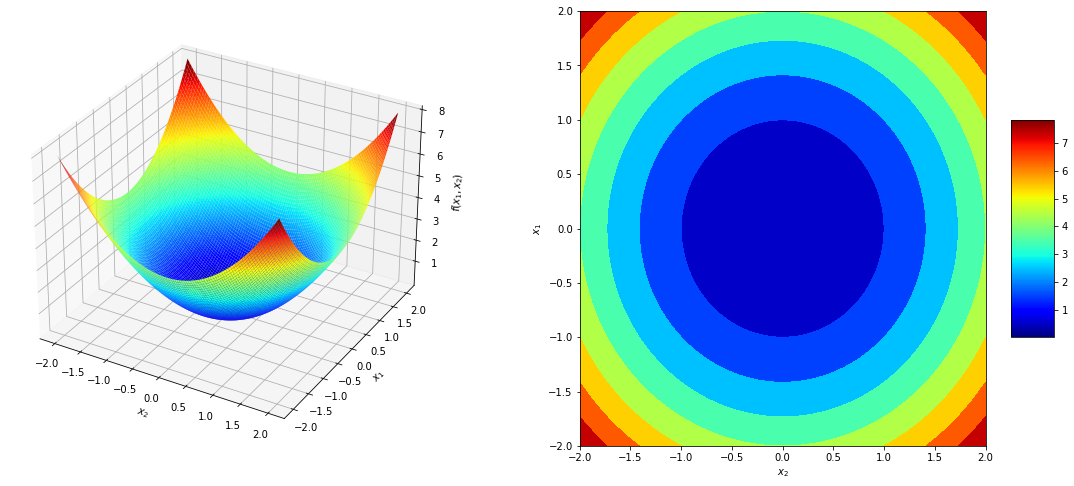

In [11]:
plot_function_surface(f)

As we can clearly see in the previous figure, this is a paraboloid that has a minimum at $(0, 0)$. Let us now compute the gradient:

$$\nabla f(\mathbf{x}) = \bigg( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \bigg) = \Big( 2x_0, 2x_1 \Big) $$

In [12]:
def grad_f(x_0, x_1):
    return np.array([2*x_0, 2*x_1])

Let $x^\star$ be the minimum of the function. With what we can see in the previous plot and what we have said, we can conclude that:

$$x^\star = (0, 0)$$

Let us now compute the Hessian of the function:

$$ \nabla^2 f(\mathbf{x}) = \begin{pmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} \\ \frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} \end{pmatrix} = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix} $$

In [13]:
def hessian_f():
    return np.array([[2, 0], [0, 2]])

In [14]:
hessian_f()

array([[2, 0],
       [0, 2]])

We can clearly see that there's a single degenerate eigenvalue, which is 2 at every single point of the plane. Since the only critical point is the origin, we have sufficient conditions to determine that $x^\star$ is a minimum for our funcion $f(x)$.

In order to see what could happen when we have other combination of eigenvalues, we will now analyze the following functions.

The first function that we are goint to study is $f_A$, which is defined as follows:

$$ f_A(\mathbf{x}) = -x_1^2 - x_2^2 $$

Let's plot it to see its surface:

In [15]:
def f_A(x_1, x_2):
    return -f(x_1, x_2)

<Figure size 432x288 with 0 Axes>

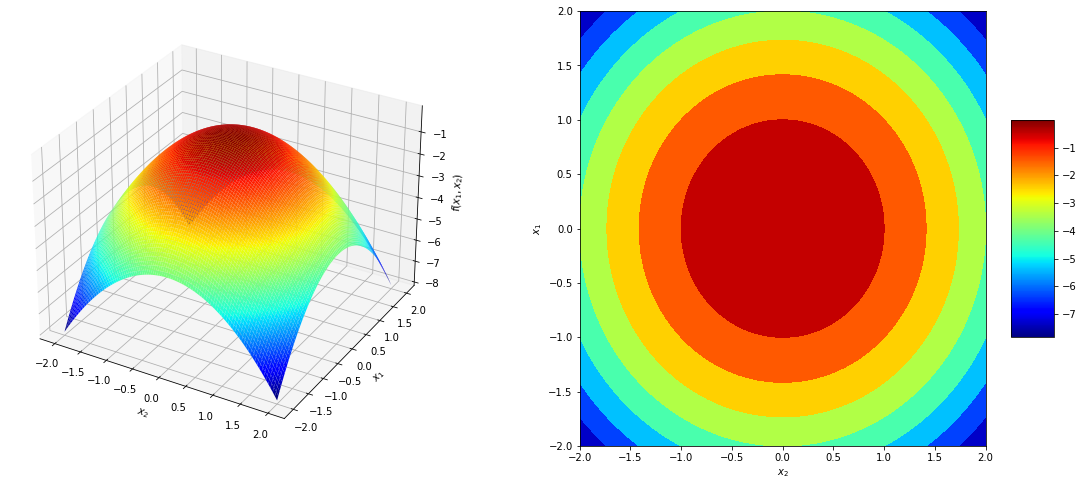

In [16]:
plot_function_surface(f_A)

We have the same paraboloid from $f(x)$, but in this case it is inverted. The gradient of the function is the following:

$$\nabla f_A(\mathbf{x}) = \big( -2x_1, -2x_2 \big)$$

As we can clearly see, the gradient is only going to be 0 at the origin once again. In this case, the Hessian matrix is also going to be the opposite of the Hessian matrix of $f(x)$, as we can see here:

$$ \nabla^2 f_A(\mathbf{x}) = \begin{pmatrix} -2 & 0 \\ 0 & -2 \end{pmatrix} $$

So, we only have a single degenerate eigenvalue, which is $-2$. For the same reasons as before, $x^\star = (0, 0)$ is a maximum of our function $f_A$.

The next function that we are going to study is $f_B$, which is defined as follows:

$$f_B(\mathbf{x}) = x_1^2 - x_2^2$$

As we have been doing up until now, let's plot its surface to get more information:

In [17]:
def f_B(x_1, x_2):
    return x_1**2 - x_2**2

<Figure size 432x288 with 0 Axes>

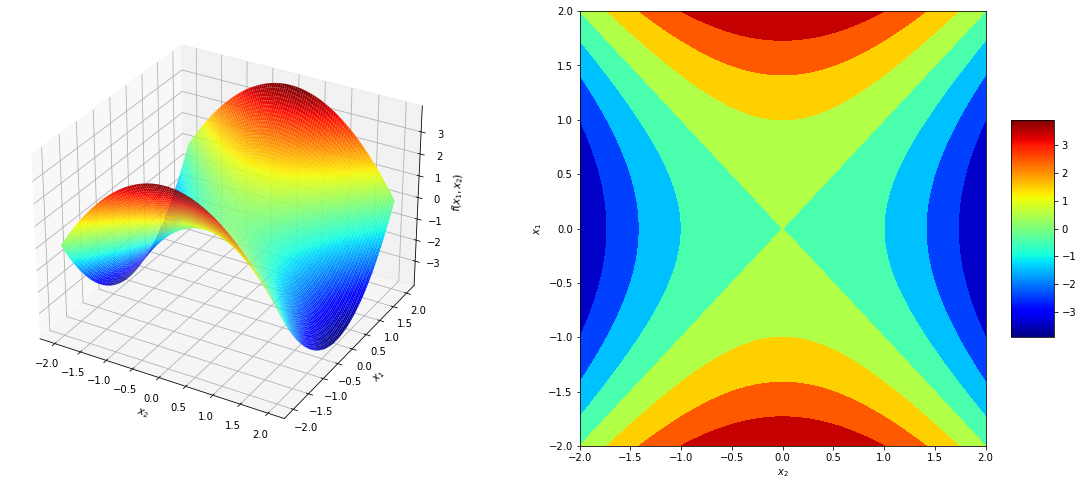

In [18]:
plot_function_surface(f_B)

We can already see that $f_B$ has the shape of a saddle and therefore it is not going to have any minimums or maximums. In this case, the gradient is given by the following expresion:

$$\nabla f_B(\mathbf{x}) = \big( 2x_1, -2x_2 \big)$$

In [19]:
def grad_f_B(x_1, x_2):
    return np.array([2*x_1, -2*x_2])

Once again, we have that $x^\star = (0, 0)$ is the **only** critical point of the function $f_B$.

Let us now compute the Hessian matrix, which has the following value:

$$ \nabla^2 f_B(\mathbf{x}) = \begin{pmatrix} 2 & 0 \\ 0 & -2 \end{pmatrix} $$

In [20]:
def hessian_f_b():
    return np.array([[2, 0], [0, -2]])

In [21]:
hessian_f_b()

array([[ 2,  0],
       [ 0, -2]])

In this case we have two eigenvalues of different sign: $\lambda_1=2$ and $\lambda_2 = -2$. Thus our Hessian matrix is indefinite at every point of the plane. In this case there are no maximums or minimums for our function and $x^\star$ is the classical example of a saddle point of $\mathbb{R}^2$ defined functions.

Finally, let's study one last function, $f_C$, which is defined as follows:

$$f_c(\mathbf{x}) = x_1^2$$

Before continuing, let's plot it:

In [22]:
def f_C(x_1, x_2):
    return x_1**2

<Figure size 432x288 with 0 Axes>

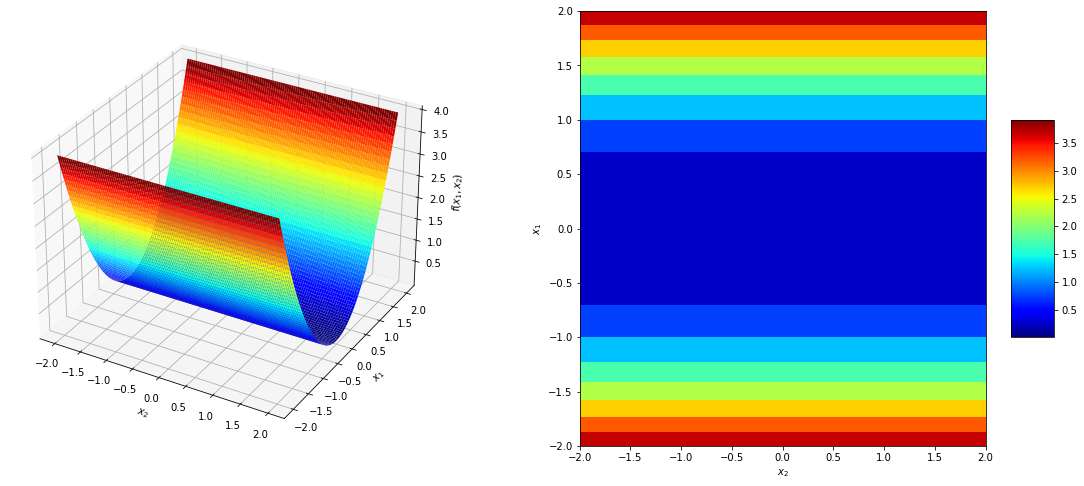

In [23]:
plot_function_surface(f_C)

We can clearly see that this function is the $x^2$ function but in two dimensions. Thanks to the previous plot, we see that all the points in the line $x_1 = 0$ are critical points of our function. This is even further evidenced by the gradient:

$$\nabla f_C(\mathbf{x}) = \big( 2x_1, 0 \big)$$

In [24]:
def grad_f_C(x_1, x_2):
    return np.array([2*x_1, 0])

In this case, the Hessian matrix is the following:

$$ \nabla^2 f_C(\mathbf{x}) = \begin{pmatrix} 2 & 0 \\ 0 & 0 \end{pmatrix} $$

In [25]:
def hessian_f_C():
    return np.array([[2, 0], [0, 0]])

In this case, the eigenvalues are $\lambda_1 = 2 > 0$ and $\lambda_2 = 0$. Thus, our Hessian matrix is going to be positive semidefinite for all $x \in \mathbb{R}^2$. This implies that $f_C$ is convex and this is enough to justify that $f_C$ reaches its minimum at all the points of the line $x_1 = 0$.

## 2.2 A more complex two dimensional function

Now we are going to study a more complex two dimensional function, which is defined as follows:

$$ f(x_1, x_2) = x_1^2 \bigg(4 - 2.1x_1^2 + \frac{1}{3}x_1^4 \bigg) + x_1 x_2 + x_2^2 (-4 + 4x_2^2) $$

Let's have a look at its surface:

In [26]:
def f(x_1, x_2):
    return x_1**2 * (4- 2.1 * x_1**2 + (1/3) * x_1**4) + x_1 * x_2 + x_2**2 * (-4 + 4*x_2**2)

<Figure size 432x288 with 0 Axes>

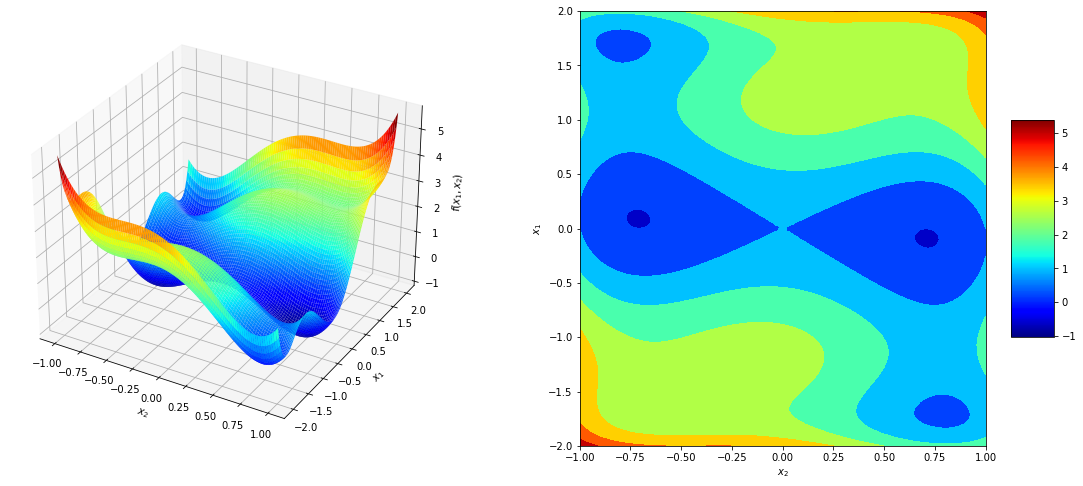

In [27]:
plot_function_surface(f, x_2_range=(-1, 1))

We can see in the plot of the function (and its contour lines) that there are several local minima and maxima due to the higher complexity of the function's expression.

Now, we are going to analytically compute the gradient and Hessian of the function:


$$\nabla f(x_1, x_2) = \big( 8x_1 - 8.4x_1^3 + 2x_1^5 + x_2, x_1 - 8x_2 + 16x_2^3 \big)$$

$$ \nabla^2 f(x_1, x_2) = \begin{pmatrix} 8 - 25.2x_1^2 + 10x_1^4 & 1 \\ 1 & -8 + 48x_2^2 \end{pmatrix} $$

In [28]:
def grad_f(x_1, x_2):
    return np.array([8*x_1 - 8.4*x_1**3 + 2*x_1**5 + x_2, x_1 - 8*x_2 + 16*x_2**3])

def hessian_f(x):
    return np.array([[8 - 25.2*x[0]**2 + 10*x[0]**4, 1], [1, -8 + 48*x[1]**2]])

Since the function has multiple critical points, we are going to create a very simple function to find them. This function is going to perform the following steps:

1. Discretize the space of the function in a range. In this case, in the range $[-2, 2]$ with a step size of $0.005$.
2. Compute the gradient at each point.
3. Compute the squared Euclidean norm of each gradient
4. For each point (except for the borders of the function), evaluate a $3 \times 3$ neighborhood around each of them.
5. Select those points whose value of the squared 2-norm is strictly smaller than its neighbor's.

As we can see, this function is both extremely naive and inefficient due to the huge amount of computations that have to be performed.

Nevertheless, let's define the function that we are going to use to find the critical points of $f$:

In [29]:
def brute_force_search(grad_func):
    '''
    Function used to compute the local extrema of a function.
    
    Computes all of the points that may be local extrema of a given
    function by computing a map of the gradients at each point and
    checking the neighborhood of each point. If the element is strictly
    smaller than all of the elements of the neighborhood, it is considered
    as a local extrema. The neighborhood is a 3x3 square around an element.
    The borders of the grid are not eligible to be extrema points.
    
    Parameters
    ----------
        func: function (N,), (N,) -> (Ni, Nj)
            Function to plotted. It is applied to each pair of values of
            the grid and returns a new value. 
            
    Returns
    -------
        x_1_extrema: ndarray(N,)
            x_1 axis coordinates of the local extrema points.
            
        x_2_extrema: ndarray(N,)
            x_2 axis coordinates of the local extrema points.
        
        grad_extrema: ndarray(N,)
            Squared sum of the gradient at the point (x_1, x_2).
    '''
    
    # Generate grid of points
    x_1 = np.arange(-2, 2.005, 0.005)
    x_2 = np.arange(-1, 1.005, 0.005)
    
    X_1, X_2 = np.meshgrid(x_1, x_2)
    grid_shape = X_1.shape
    
    # Returns a (2, 321201) ndarray
    # The first row contains the partial derivatives of x_1
    # The second row contains the partial derivatives of x_2
    Z = grad_func(np.ravel(X_1), np.ravel(X_2))
    Z_norm = Z[0, :]**2 + Z[1, :]**2
    
    Z_norm_grid = Z_norm.reshape(grid_shape)
    
    x_1_extrema = []
    x_2_extrema = []
    grad_extrema = []
    
    for i in range (1, grid_shape[0] - 1):
        for j in range (1, grid_shape[1] - 1):
            # Get neighborhood around current element and squeeze it into an array
            neighborhood = Z_norm_grid[i-1:i+2, j-1:j+2].ravel()
            
            # Create an array containing the neighbors of the current element
            # and remove it from the array
            neighbors = np.r_[neighborhood[:4], neighborhood[5:]]
            
            if np.all(Z_norm_grid[i, j] < neighbors):
                x_1_extrema.append(X_1[i, j])
                x_2_extrema.append(X_2[i, j])
                grad_extrema.append(Z_norm_grid[i, j])

    return np.array(x_1_extrema), np.array(x_2_extrema), np.array(grad_extrema)

In the following, we show the 15 critical points of our function and the value of the square of the norm applied to the gradient at those points, which will always be less than the tolerance we chose. Those are our candidates for the extremas (and the saddle points).

In [30]:
x_1_extrema, x_2_extrema, grad_extrema = brute_force_search(grad_f)

for x_1, x_2, grad in zip(x_1_extrema, x_2_extrema, grad_extrema):
    print(f'x_1: {x_1}, x_2: {x_2}, gradient: {grad}')

x_1: 1.704999999999921, x_2: -0.7949999999999998, gradient: 0.00143016789599396
x_1: 1.1099999999999337, x_2: -0.7699999999999998, gradient: 0.0012559284739304191
x_1: 0.08999999999995545, x_2: -0.7149999999999997, gradient: 0.0014768714734526888
x_1: -1.295000000000015, x_2: -0.6049999999999996, gradient: 4.540503633256789e-05
x_1: -1.6050000000000084, x_2: -0.5699999999999996, gradient: 0.0004156534940928455
x_1: -1.6400000000000077, x_2: -0.22999999999999932, gradient: 0.00067458253056989
x_1: -1.2300000000000164, x_2: -0.15999999999999925, gradient: 0.00024181811612573363
x_1: -4.263256414560601e-14, x_2: 8.881784197001252e-16, gradient: 1.181910851247381e-25
x_1: 1.2299999999999311, x_2: 0.16000000000000103, gradient: 0.0002418181161218803
x_1: 1.6399999999999224, x_2: 0.2300000000000011, gradient: 0.000674582530516444
x_1: 1.6049999999999232, x_2: 0.5700000000000014, gradient: 0.00041565349412206665
x_1: 1.2949999999999298, x_2: 0.6050000000000013, gradient: 4.5405036339608944e-0

We are now going to compute the Hessian matrices at each of one those points. These matrices are going to give us information about the shape of the quadratic approximation at each one of the critical points that we have found.

The Hessian matrices at each of those points, following the same order, are shown below:

In [31]:
extrema_points = np.column_stack([x_1_extrema, x_2_extrema])
hessians = np.apply_along_axis(hessian_f, 1, extrema_points)
print(hessians)

[[[19.25091351  1.        ]
  [ 1.         22.3372    ]]

 [[-7.8682159   1.        ]
  [ 1.         20.4592    ]]

 [[ 7.7965361   1.        ]
  [ 1.         16.5388    ]]

 [[-6.13690149  1.        ]
  [ 1.          9.5692    ]]

 [[ 9.44321801  1.        ]
  [ 1.          7.5952    ]]

 [[12.5615616   1.        ]
  [ 1.         -5.4608    ]]

 [[-7.2364159   1.        ]
  [ 1.         -6.7712    ]]

 [[ 8.          1.        ]
  [ 1.         -8.        ]]

 [[-7.2364159   1.        ]
  [ 1.         -6.7712    ]]

 [[12.5615616   1.        ]
  [ 1.         -5.4608    ]]

 [[ 9.44321801  1.        ]
  [ 1.          7.5952    ]]

 [[-6.13690149  1.        ]
  [ 1.          9.5692    ]]

 [[ 7.7965361   1.        ]
  [ 1.         16.5388    ]]

 [[-7.8682159   1.        ]
  [ 1.         20.4592    ]]

 [[19.25091351  1.        ]
  [ 1.         22.3372    ]]]


From a quick look at the Hessian matrices obtained, none of them will be (positive or negative) semidefinite (for example, their rank is 2 and 0 can't be an eigenvalue). Thus, the critical points obtained will have a Hessian matrix with a combination of positive and negative eigenvalues that will lead us to classify them as either a minimum (two positive eigenvalues), a maximum (two negative eigenvalues) or a saddle point (each eigenvalue has a different sign).

In the same order as before, we will calculate those eigenvalues and find out the nature of our critical points:

In [32]:
hessians_eigvals = np.linalg.eigvals(hessians)

for hessian_eigval, point in zip(hessians_eigvals, extrema_points):
    if hessian_eigval[0] > 0 and hessian_eigval[1] > 0:
        print(f'{point} --> minimum eigenvalues: {hessian_eigval})')
    elif hessian_eigval[0] < 0 and hessian_eigval[1] < 0:
        print(f'{point} --> maximum (eigenvalues: {hessian_eigval})')
    else:
        print(f'{point} --> saddle point (eigenvalues: {hessian_eigval})')

[ 1.705 -0.795] --> minimum eigenvalues: [18.95522803 22.63288548])
[ 1.11 -0.77] --> saddle point (eigenvalues: [-7.90347351 20.49445761])
[ 0.09  -0.715] --> minimum eigenvalues: [ 7.683608  16.6517281])
[-1.295 -0.605] --> saddle point (eigenvalues: [-6.20031498  9.63261349])
[-1.605 -0.57 ] --> minimum eigenvalues: [9.88074954 7.15766846])
[-1.64 -0.23] --> saddle point (eigenvalues: [12.61687844 -5.51611684])
[-1.23 -0.16] --> maximum (eigenvalues: [-8.03050482 -5.97711108])
[-4.26325641e-14  8.88178420e-16] --> saddle point (eigenvalues: [ 8.06225775 -8.06225775])
[1.23 0.16] --> maximum (eigenvalues: [-8.03050482 -5.97711108])
[1.64 0.23] --> saddle point (eigenvalues: [12.61687844 -5.51611684])
[1.605 0.57 ] --> minimum eigenvalues: [9.88074954 7.15766846])
[1.295 0.605] --> saddle point (eigenvalues: [-6.20031498  9.63261349])
[-0.09   0.715] --> minimum eigenvalues: [ 7.683608  16.6517281])
[-1.11  0.77] --> saddle point (eigenvalues: [-7.90347351 20.49445761])
[-1.705  0.795

As we can see above, our function has 6 minimums, 2 maximums and 7 saddle points!